In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.recurrent import LSTM
np.random.seed(1234)
from keras.layers import *

In [4]:
# Load Training and testing data pre-processed in csv files
training_data_df = pd.read_csv("../pre_process/AReM_Training.csv")
testing_data_df = pd.read_csv("../pre_process/AReM_Testing.csv")

# Load X_train and X_test
X_train = training_data_df.drop('Motion', axis=1).values
X_test = testing_data_df.drop('Motion', axis=1).values

# Load Y_train and Y_test
Y_val_train = training_data_df[['Motion']].values
Y_val_test = testing_data_df[['Motion']].values

# Encode Y_training values and T_testing values with LabelEncoder
encoder = LabelEncoder()
Y_enc_train = encoder.fit_transform(Y_val_train)
Y_enc_test = encoder.fit_transform(Y_val_test)

# Convert Y_enc_train and Y_enc_test to categorical values
Y_train = np_utils.to_categorical(Y_enc_train)
Y_test = np_utils.to_categorical(Y_enc_test)

C:\Users\Shaan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  

In [9]:
model = Sequential()
layers = [1, 50, 100, 1]
model.add(LSTM(layers[1],input_shape=(None, 1),return_sequences=True, unit_forget_bias=True))
model.add(Dropout(0.2))
model.add(LSTM(layers[2],return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation("softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 707       
_________________________________________________________________
activation_1 (Activation)    (None, 7)                 0         
Total params: 71,507
Trainable params: 71,507
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train,nb_epoch=40, batch_size=15, validation_data=(X_test, Y_test),verbose=2)

C:\Users\Shaan\Anaconda3\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 33407 samples, validate on 8352 samples
Epoch 1/40
 - 31s - loss: 1.6383 - acc: 0.3357 - val_loss: 1.4908 - val_acc: 0.4126
Epoch 2/40
 - 28s - loss: 1.3741 - acc: 0.4674 - val_loss: 1.2866 - val_acc: 0.5000
Epoch 3/40
 - 29s - loss: 1.2448 - acc: 0.5263 - val_loss: 1.1761 - val_acc: 0.5597
Epoch 4/40
 - 28s - loss: 1.1621 - acc: 0.5577 - val_loss: 1.0938 - val_acc: 0.5893
Epoch 5/40
 - 26s - loss: 1.0964 - acc: 0.5895 - val_loss: 1.0449 - val_acc: 0.6099
Epoch 6/40
 - 25s - loss: 1.0488 - acc: 0.6057 - val_loss: 1.0200 - val_acc: 0.6191
Epoch 7/40
 - 27s - loss: 1.0112 - acc: 0.6244 - val_loss: 0.9876 - val_acc: 0.6312
Epoch 8/40
 - 26s - loss: 0.9815 - acc: 0.6315 - val_loss: 0.9653 - val_acc: 0.6341
Epoch 9/40
 - 28s - loss: 0.9537 - acc: 0.6475 - val_loss: 0.9541 - val_acc: 0.6377
Epoch 10/40
 - 33s - loss: 0.9261 - acc: 0.6552 - val_loss: 0.9315 - val_acc: 0.6494
Epoch 11/40
 - 30s - loss: 0.9025 - acc: 0.6639 - val_loss: 0.9048 - val_acc: 0.6625
Epoch 12/40
 - 29s - loss

In [12]:
y_pred=model.predict(X_test)

In [13]:
predict_class = np.argmax(y_pred, axis=1)
predict_class = predict_class.tolist()
predict_class

[0,
 5,
 5,
 4,
 6,
 3,
 3,
 6,
 6,
 4,
 4,
 1,
 4,
 4,
 3,
 2,
 0,
 4,
 5,
 3,
 6,
 2,
 4,
 4,
 5,
 4,
 6,
 6,
 5,
 6,
 2,
 6,
 6,
 3,
 5,
 0,
 6,
 0,
 5,
 5,
 6,
 6,
 6,
 0,
 0,
 4,
 6,
 2,
 6,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 3,
 4,
 4,
 6,
 3,
 5,
 4,
 6,
 3,
 3,
 6,
 3,
 1,
 1,
 2,
 5,
 4,
 4,
 2,
 5,
 6,
 2,
 3,
 2,
 5,
 3,
 5,
 3,
 2,
 1,
 2,
 5,
 2,
 4,
 6,
 4,
 5,
 3,
 2,
 3,
 6,
 4,
 0,
 2,
 6,
 4,
 6,
 4,
 3,
 6,
 3,
 3,
 4,
 4,
 6,
 5,
 2,
 2,
 4,
 6,
 6,
 4,
 6,
 5,
 3,
 3,
 4,
 2,
 4,
 6,
 2,
 5,
 3,
 3,
 5,
 6,
 2,
 0,
 1,
 1,
 4,
 2,
 5,
 0,
 2,
 3,
 1,
 2,
 5,
 5,
 4,
 4,
 1,
 2,
 4,
 6,
 2,
 4,
 2,
 4,
 0,
 5,
 0,
 4,
 3,
 6,
 3,
 4,
 2,
 2,
 6,
 4,
 5,
 6,
 3,
 3,
 0,
 6,
 4,
 0,
 0,
 5,
 2,
 5,
 0,
 0,
 6,
 6,
 6,
 5,
 2,
 1,
 3,
 3,
 2,
 6,
 2,
 5,
 1,
 4,
 3,
 3,
 4,
 3,
 2,
 5,
 3,
 0,
 4,
 4,
 6,
 5,
 6,
 6,
 5,
 4,
 4,
 3,
 2,
 5,
 4,
 4,
 6,
 5,
 3,
 2,
 0,
 3,
 2,
 5,
 4,
 5,
 1,
 5,
 0,
 2,
 4,
 3,
 2,
 2,
 0,
 5,
 3,
 0,
 1,
 4,
 6,
 0,
 5,
 2,
 6,
 4,
 2,
 4,


In [14]:
y_predonehot = np_utils.to_categorical(predict_class)

In [15]:
y_test_non_category = [ np.argmax(t) for t in Y_test ]
y_predict_non_category = [ np.argmax(t) for t in y_pred ]

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix( y_predict_non_category,y_test_non_category)

In [16]:
conf_mat

array([[ 423,    7,   19,    8,   29,   38,   42],
       [   6,  355,   11,    3,    9,    5,   14],
       [  36,   16,  761,   11,   67,  131,  385],
       [  29,   11,   37, 1275,   58,   39,   43],
       [  54,   33,   41,   30, 1133,   90,   48],
       [  52,   29,   61,   16,   78, 1083,   59],
       [  61,   27,  484,   38,   87,   77,  903]], dtype=int64)

In [17]:
classes = ['Bending1', 'Bending2', 'Cycling', 'Lying', 'Sitting', 'Standing', 'Walking']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(classes)

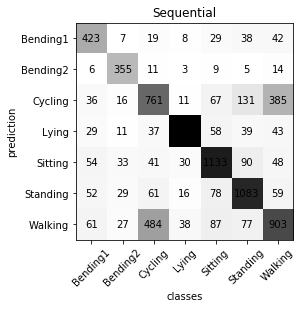

In [18]:
import matplotlib.pyplot as plt
rf_im = plt.imshow(conf_mat, cmap=plt.cm.binary)
plt.title('Sequential')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, classes, rotation=45)
plt.xlabel('classes')
plt.ylabel('prediction')
plt.yticks(tick_marks, classes)
width, height = conf_mat.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(conf_mat[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.show()

In [19]:
import seaborn as sns
ax = sns.heatmap(conf_mat,cmap="YlGnBu", annot=True , fmt = "d", xticklabels=classes, yticklabels=classes)
ax.set_xticklabels(classes, rotation=30)
ax.set_title("LSTM")
ax.set_ylabel("Predictions")
ax.set_xlabel("Classes")

C:\Users\Shaan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shaan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shaan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Shaan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

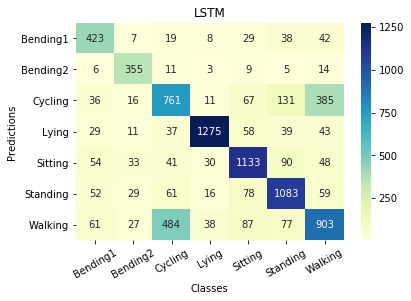

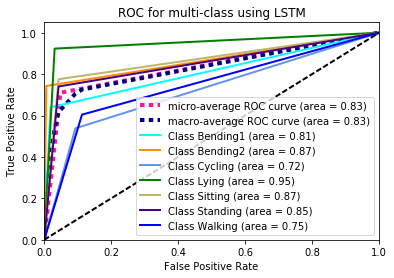

In [20]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from scipy import interp
n_classes = 7
lw=2
fpr = dict()

tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_predonehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_predonehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','g','darkkhaki','indigo','b','peru','pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='Class {0} (area = {1:0.2f})'
             ''.format(le.inverse_transform(i), roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class using LSTM')
plt.legend(loc="lower right")
plt.show()